In [1]:
#Imports
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import numpy as np

from IPython.display import Image
from graphviz import Digraph

In [2]:
# Node class definition
class Node:
    def __init__(self, value): #Constructor
        self.val = value #Stores the value of the node
        self.right = None #Pointer to the right child node
        self.left = None #Pointer to the left child node
        self.height = 1 #Initialize height
        self.balance = 0 #Initialize balance factor
        self.parent = None #Pointer to parent node

#Gets height of a node        
def get_height(node):
    if not node:
        return 0
    return node.height

#Updates node height
def update_height(node):
    if not node:
        return
    node.height = 1 + max(get_height(node.left), get_height(node.right))

#Gets balance    
def get_balance(node):
    if not node:
        return 0
    return node.balance

#Update balance 
def update_balance(node):
    if not node:
        return 
    node.balance = get_height(node.left) - get_height(node.right)

In [3]:
#Builds binary tree
def build_binary_tree(nodes):
    if len(nodes) == 0:
        raise ValueError('List is empty')
    #Creates binarey tree
    root = binary_tree(nodes, 0, len(nodes) - 1)
    update_tree(root)
    return root
        
#Constructs a balanced tree from a list of nodes    
def binary_tree(nodes, start, end, parent=None):
    if start > end:
        return
    
    middle = (start + end) // 2
    root = Node(nodes[middle])
    root.parent = parent
    root.left = binary_tree(nodes, start, middle - 1, root)
    root.right = binary_tree(nodes, middle + 1, end, root)
    return root

#Updates the height and balance of each node
def update_tree(node):
    if not node:
        return
    update_tree(node.left)
    update_tree(node.right)
    update_height(node)
    update_balance(node)

#Visualizes the tree
def visualize_tree(tree):
    
    #Adds nodes and edges
    def add_nodes_edges(tree, dot=None): #Adds nodes and edges to the graph
        if dot is None: #Create a Diagraph object if there is none
            dot = Digraph() 
            # Add root node
            label = f'{tree.val}\nBal: {tree.balance}'
            dot.node(name=str(tree), label=label)
        #Adds right and left child nodes if they exist
        if tree.left:
            label = f'{tree.left.val}\nBal: {tree.left.balance}'
            dot.node(name=str(tree.left), label=label)
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
        if tree.right:
            label = f'{tree.right.val}\nBal: {tree.right.balance}'
            dot.node(name=str(tree.right), label=label)
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Return the graph
    return dot

#Checks if binary tree is balanced
def is_balanced(node):
    if not node:
        return True
    
    balance = get_balance(node)
    if balance > 1 or balance < -1:
        return False
    
    return is_balanced(node.left) and is_balanced(node.right)

In [4]:
def insert(nodes, val):
    if nodes is None: #If tree is empty make a new node
        return Node(val)

    #If the inserted value is smaller insert it into the left subtree
    if val < nodes.val:
        nodes.left = insert(nodes.left, val)
        nodes.left.parent = nodes #Set parent
    else: #Else insert it in the right subtree
        nodes.right = insert(nodes.right, val)
        nodes.right.parent = nodes
    
    #Update height and balance
    update_height(nodes)
    update_balance(nodes)
    
    # Balance the tree if necessary using rotations
    balance = get_balance(nodes)
    
    if balance > 1: #Left heavy
        if val < nodes.left.val: #If the inserted value is at the left of the left child
            return right_rotate(nodes) #Perform right rotation
        else:
            nodes.left = left_rotate(nodes.left)
            return right_rotate(nodes)
        
    if balance < -1: #Right heavy
        if val > nodes.right.val:
            return left_rotate(nodes) #Perform left rotation
        else:
            nodes.right = right_rotate(nodes.right)
            return left_rotate(nodes)
        
    return nodes

#The minimum value node
def min_value_node(node):
    current = node
    # Loop down to find the leftmost leaf
    while current.left is not None:
        current = current.left
    return current

#Deletes a node
def delete(node, val): #Checks if there are any nodes in the tree
    if node is None:
        return node

    
    if val < node.val:
        node.left = delete(node.left, val) #If nodes.left
    elif val > node.val:
        node.right = delete(node.right, val) #If nodes.right
    else:
        # Node with only one child or no child
        if node.left is None:
            temp = node.right
            if temp:
                temp.parent = node.parent
            node = None #Delete the node
            return temp
        elif node.right is None:
            temp = node.left
            if temp:
                temp.parent = node.parent
            node = None
            return temp
        
        # Node with two children: Get the inorder successor
        temp = min_value_node(node.right)
        node.val = temp.val
        node.right = delete(node.right, temp.val)
    
    if node is None:
        return node
    
    # Update height and balance of the current node
    update_height(node)
    update_balance(node)
    
    # Balance the node if necessary
    balance = get_balance(node)
    if balance > 1:
        if get_balance(node.left) >= 0:
            return right_rotate(node)
        else:
            node.left = left_rotate(node.left)
            return right_rotate(node)
    if balance < -1:
        if get_balance(node.right) <= 0:
            return left_rotate(node)
        else:
            node.right = right_rotate(node.right)
            return left_rotate(node)
    
    return node

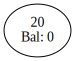

In [5]:
#Finds node with a specific value in a tree
def find_node(root, value):
    if root is None or root.val == value:
        return root
    if value < root.val: #If the value is smaller than the root search in the left subtree
        return find_node(root.left, value)
    else: #If larger search in the right subtree
        return find_node(root.right, value)

#Find the first common ancestor of two nodes
def find_first_common_ancestor(root, val1, val2):
    node1 = find_node(root, val1)
    node2 = find_node(root, val2)
    if not node1 or not node2:
        return None
    #Finds the common ancestor in the tree
    while root:
        if val1 < root.val and val2 < root.val:
            root = root.left
        elif val1 > root.val and val2 > root.val:
            root = root.right
        else:
            return root
    return None

#Left rotation
def left_rotate(x):
    y = x.right
    x.right = y.left
    if y.left is not None:
        y.left.parent = x
    y.parent = x.parent
    if x.parent is None:
        root = y
    elif x == x.parent.left:
        x.parent.left = y
    else:
        x.parent.right = y
    y.left = x
    x.parent = y
    update_height(x)
    update_height(y)
    update_balance(x)
    update_balance(y)
    return y

#Right rotation
def right_rotate(y):
    x = y.left
    y.left = x.right
    if x.right is not None:
        x.right.parent = y
    x.parent = y.parent
    if y.parent is None:
        root = x
    elif y == y.parent.left:
        y.parent.left = x
    else:
        y.parent.right = x
    x.right = y
    y.parent = x
    update_height(y)
    update_height(x)
    update_balance(y)
    update_balance(x)
    return x


# Create an initial tree
nodes = [20]
root = build_binary_tree(nodes)
dot = visualize_tree(root)
display(dot)

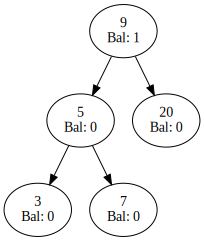

Is the tree balanced? True


In [6]:
# Insert nodes and visualize the tree
root = insert(root, 9)
root = insert(root, 3)
root = insert(root, 7)
root = insert(root, 5)




dot = visualize_tree(root)
display(dot)
print(f'Is the tree balanced? {is_balanced(root)}')

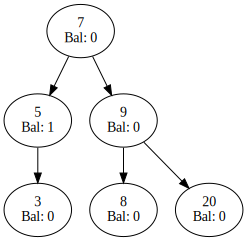

Is the tree balanced? True


In [7]:
# Delete nodes and visualize the tree
#root = delete(root, 9)
root = insert(root, 8)


dot = visualize_tree(root)
display(dot)
print(f'Is the tree balanced? {is_balanced(root)}')

In [17]:
#Finds the ancestor of 7 and 12
ancestor = find_first_common_ancestor(root, 7, 12)
print(ancestor.val)

10
